# Clustering: K-means
Zdroj: [Jiří Pešík. *Python pro data science.*](https://github.com/pesikj/PythonProDataScience)
(upraveno)

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Popis importů

* `TSNE`: redukce dimenzionality (počtu sloupců) s využitím algoritmu TSNE, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
* `KMeans`: shlukování s využitím algoritmu K-Means, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* `StandardScaler`: objekt pro normalizaci dat, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

## Unsupervised learning

Doposud jsme se zabývali klasifikací jako jednou z podtříd supervised learning, tedy úloh, kde předem známe správné odpovědi. Model se pomocí algoritmu a trénovacích dat, které obsahují tyto správné odpovědi, "naučí" jak jednotlivé třídy vypadají, aby později mohl přiřazovat nová data do tříd. V případě regresní úlohy nová data nedostanou přiřazenou třídu, ale nějakou hodnotu jako reálné číslo. Obecný koncept je ale stejný.

V této lekci se budeme věnovat úlohám bez supervize, tedy takovým, kde **předem neznáme správné odpovědi,** nebo tyto odpovědi vůbec neexistují. 

Příklady takových úloh jsou: 

- rozdělování dat na shluky (clustering), na rozdíl od klasifikačních úloh **ale nevíme o žádném záznamu, do kterého shluku patří, ani nevíme, kolik by takových shluků mělo být,**
- hledání anomálií v datech (tj. hledáme něco neobvyklého, například neobvyklé datové toky v síti nebo podivné údaje z nějakého měřícího zařízení).

### Shlukování dat (clustering)

Na obrázku například vidíme data, nad kterými by se dalo přemýšlet jako nad dvěma nebo třemi shluky. Důležité je, že o žádném údaji nevíme, do kterého shluku by měl patřit! Rozdělení je tedy čistě na nás. Je na nás, na kolik shluků data rozdělíme.

![clustering.png](images/clustering.png)

### K-means clustering

Ukážeme si shlukovací algoritmus K-means. _K_ proto, že očekává zadaný počet shluků od uživatele, a _means_ zde znamená průměr - střed shluku neboli _centroid_.

Algoritmus k-means se skládá z následujících kroků:

1. **Výběr počtu shluků (k)**: Algoritmus k-means vyžaduje, abyste předem určili počet shluků, které chcete vytvořit. Počet těchto shluků se označuje jako 'k'. Algoritmus můžeme spouštět opakovaně s různým počtem nastavených shluků a sledovat, jak dobře takový počet "sedí" na naše data.
1. **Náhodná inicializace středů shluků**: Poté, co jsme určili hodnotu 'k', algoritmus náhodně vybere 'k' bodů z datové sady. Tyto body se stávají prvními 'centroidy' - tedy středy shluků.
1. **Přiřazení bodů k nejbližším středům shluků**: Každý bod v datové sadě se nyní přiřadí k tomu centroidu, ke kterému má nejkratší vzdálenost. Tím se vytvoří dočasné shluky.
1. **Přesu středů shluků**: Poté, co jsou všechny body přiřazeny k shlukům, algoritmus spočítá nový střed každého shluku jako průměr všech bodů, které do tohoto shluku patří. Následně je *centroid* přesunutý do středu shluku.
1. **Opakování kroků 3 a 4**: Algoritmus nyní opakuje kroky 3 a 4, dokud se středy shluků nepřestanou posouvat nebo dokud se nevyčerpá předem stanovený počet iterací. Každá iterace upřesňuje středy shluků a přiřazuje body k novým středům.

![kmeans.png](images/kmeans.png)

Úloha, která nás bude provázet lekcí, se klasifikace uživatelů kreditních karet, která jsou v souboru [CC_GENERAL.CSV](CC_GENERAL.CSV).

[Zdroj dat](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download)

Popisy sloupců (features):

* CUST_ID: Identifikace držitele kreditní karty (Kategorické)
* BALANCE: Zůstatek na účtu pro nákupy
* BALANCE_FREQUENCY: Jak často se aktualizuje zůstatek, skóre mezi 0 a 1 (1 = často aktualizováno, 0 = nečasto aktualizováno)
* PURCHASES: Částka nákupů provedených z účtu
* ONEOFF_PURCHASES: Maximální částka nákupu provedená najednou
* INSTALLMENTS_PURCHASES: Částka nákupu provedená na splátky
* CASH_ADVANCE: Hotovost předem poskytnutá uživatelem
* PURCHASES_FREQUENCY: Jak často se provádějí nákupy, skóre mezi 0 a 1 (1 = často nakupováno, 0 = nečasto nakupováno)
* ONEOFFPURCHASESFREQUENCY: Jak často se provádějí nákupy najednou (1 = často nakupováno, 0 = nečasto nakupováno)
* PURCHASESINSTALLMENTSFREQUENCY: Jak často se provádějí nákupy na splátky (1 = často prováděno, 0 = nečasto prováděno)
* CASHADVANCEFREQUENCY: Jak často se platí hotovost předem
* CASHADVANCETRX: Počet transakcí provedených s "Cash in Advance"
* PURCHASES_TRX: Počet provedených nákupních transakcí
* CREDIT_LIMIT: Limit kreditní karty pro uživatele
* PAYMENTS: Částka platby provedená uživatelem
* MINIMUM_PAYMENTS: Minimální částka plateb provedených uživatelem
* PRCFULLPAYMENT: Procento úplné platby uhrané uživatelem
* TENURE: Doba trvání služby kreditní karty pro uživatele

In [3]:
X = pd.read_csv("CC_GENERAL.csv")
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Omezíme rozsah dat na prvních 1000 řádků pro rychlejší zpracování

In [4]:
X = X.head(1000)

Určitě musíme z dat odebrat sloupec `CUST_ID`, který pro strojové učení nemá význam (jde jen o náhodně přidělené ID, které neobsahuje užitečnou informaci o platebním chování klienta).

In [5]:
X = X.drop(columns=["CUST_ID"])

In [6]:
X.shape

(1000, 17)

In [7]:
# Uložení původních načtených dat pro pozdější použití
X_original_input = X

#### Normalizace dat

Ještě nás čeká jeden důležitý krok. Všimněme si, že data nejsou normalizovaná. Například sloupec `BALANCE` se pohybuje řádově v tisících, zatímco `BALANCE_FREQUENCY` se pohybuje v rozsahu 0-1.
Data normalizujeme metodou z-scores. Odečteme průměr a vydělíme standardní odchylkou:

$$z=\frac{x - μ}{σ}$$

Mohli bychom opět využít čistě pandas (například bychom si mohli napsat funkci, která data normalizuje, a pomocí `apply` jí uplatnit na každý sloupec). Ukážeme si ale jak postupovat pomocí knihovny `sklearn`

Data normalizujeme s využitím `StandardScaler()`. U unsupervised learning nedělíme data na trénovací a testovací, takže normalizujeme všechna data najednou:

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
pd.DataFrame(X)
# ... Převod na DF pouze pro přehlednější zobrazení

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.848334,-0.532097,-0.442629,-0.374017,-0.397913,-0.459968,-0.886011,-0.807137,-0.732898,-0.684020,-0.461019,-0.568036,-1.142161,-0.581741,-0.422525,-0.488964,0.28948
1,0.276570,-0.045702,-0.469719,-0.374017,-0.472912,1.779392,-1.297071,-0.807137,-0.937234,0.507409,0.054086,-0.632072,0.153773,0.317103,-0.080822,0.280632,0.28948
2,0.024901,0.440693,-0.250167,-0.099338,-0.472912,-0.459968,1.169284,2.214507,-0.937234,-0.684020,-0.461019,-0.247853,0.261768,-0.484912,-0.243849,-0.488964,0.28948
3,-0.571940,0.440693,-0.465175,-0.368333,-0.472912,-0.459968,-1.091542,-0.555334,-0.937234,-0.684020,-0.461019,-0.600054,-1.098963,-0.471948,-0.383960,-0.488964,0.28948
4,-0.218939,0.440693,-0.091117,-0.374017,0.575250,-0.459968,0.347166,-0.807137,0.493119,-0.684020,-0.461019,-0.375926,-0.969370,-0.305663,0.408163,-0.488964,0.28948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.857473,-3.450473,-0.431952,-0.326767,-0.472912,-0.459968,-0.886011,-0.303528,-0.937234,-0.684020,-0.461019,-0.568036,-1.098963,-0.448495,-0.440827,-0.488964,0.28948
996,-0.789482,0.440693,-0.017082,0.011088,-0.071974,-0.459968,-0.474953,-0.051726,-0.528560,-0.684020,-0.461019,-0.311890,-0.386199,-0.258303,-0.429959,-0.174129,0.28948
997,0.521989,0.440693,-0.205636,-0.213083,-0.097925,-0.265771,1.169284,0.703685,1.514801,-0.286879,-0.332243,1.449114,0.045779,-0.408956,-0.140384,-0.488964,0.28948
998,-0.848913,-1.991282,-0.347192,-0.220724,-0.472912,-0.459968,-0.474953,0.200077,-0.937234,-0.684020,-0.461019,-0.407944,-1.034167,-0.456411,-0.434123,-0.488964,0.28948


Proč název `fit_transform`? Tato metoda totiž dělá dvě věci najednou: napřed spočítá pro každý sloupec průměr a směrodatnou odchylku. Pak trénovací data normalizuje. Pro testovací data už nepočítá nové hodnoty průměru a odchylky, ale použije ty z trénovacích dat.

Jedná se o standardní postup: snažíme se maximálně zachovat odstup trénovacích dat od testovacích. Kdybychom využili testovací data pro spočítání průměru, už tím zprostředkováváme nějaké informace, které při trénování modelu nemáme znát.

Naše data už teď nejsou ve formátu `pandas.DataFrame`, ale jsou uložené jako matice knihovny  `numpy`.

#### Redukce dimenzionality pro vizualizaci

U shlukování je vždy dobré si data **vizualizovat**. Jak ale na to? Máme celkem 17 proměnných, to je jako 17-ti dimenzionální prostor. Vizualizovat umíme ve dvou dimenzích, možná i ve třech. V jedenácti ale těžko.

Modul `scikit-learn` má k dispozici nástroje na snížení dimenzionality ("snížení počtu proměnných"). Snížení počtu proměnných má několik výhod. Nejenom, že můžeme pak data snáz vizualizovat, ale zbavíme se problému kolinearity (korelace dvou nebo více proměnných), a navíc snížíme čas a výkon potřebný pro další modelování.

**Redukce dimenzionality je postup, který se snaží zachovat původní strukturu dat a minimalizovat ztrátu informace, ke které dojde při odebrání některých sloupců.**

Jedna z metod, která nám sníží počet proměnných ("redukuje dimenzionalitu") se jmenuje **t-SNE (t-distributed Stochastic Neighbor Embedding)**. Modul `scikit-learn` tuto metodu implementuje, pojďme ji vyzkoušet.

(Jako poněkud složitější "čtení na doma" zůstává další hojně využívaná metoda zvaná **Principal Component Analysis (PCA)**)

`TSNE` má více parametrů, nás teď bude zajímat pouze parametr `n_components`, kterým nastavíme, kolik dimenzí (proměnných) chceme. Typicky volíme hodnotu 2 nebo 3 (pro 2D nebo 3D zobrazení).

Princip metody spočívá v tom, že se snaží při redukci počtu dimenzí udržovat body, které jsou si v původní dimenzi blízké, blízko u sebe.

In [10]:
tsne = TSNE(
    n_components=2,
    random_state=42,
)

X = tsne.fit_transform(X)

Nyní jsou naše data redukovaná jen do dvou dimenzí:

In [11]:
X.shape

(1000, 2)

Redukovaná data si vykreslíme:

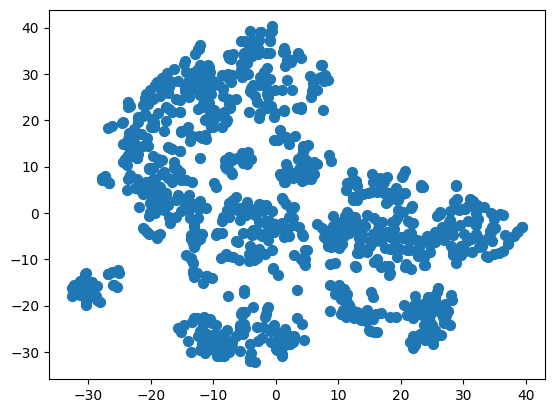

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=50)

Můžeme spustit algoritmus K-means. Uvažujme nyní, že chceme vytvořit 2 shluky.

In [13]:
model = KMeans(n_clusters=2, random_state=42, n_init="auto")
labels = model.fit_predict(X)

pd.DataFrame(labels)
# ... Převod na DF pouze pro přehlednější zobrazení

,0
0,1
1,1
2,1
3,1
4,0
...,...
995,0
996,1
997,0
998,0


Výsledek si můžeme zobrazit graficky. Každý bod obarvíme do barvy dle shluku, do kterého byl přiřazen, a doplníme i centroidy.

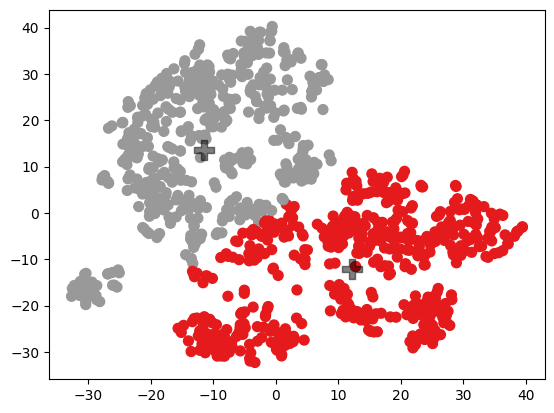

In [14]:
# Zobrazení bodů
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1")

# Zjištění centroidů
centers = model.cluster_centers_

# Zobrazení centroidů
plt.scatter(centers[:, 0], centers[:, 1], c="black", marker="P", s=200, alpha=0.5)

#### Určení vhodného počtu shluků

Dva shluky ale nemusejí být to správné číslo. Jak poznat, kolik shluků bychom měli mít? K tomu můžeme využít například metriku `inertia`.  Tato metrika je výpočet sumy kvadratických vzdáleností všech bodů v shluků ke středu shluku, neboli centroidu. Čím více máme shluků, tím spíše bude vzdálenost klesat. Ale je pravděpodobné, že tempo poklesu bude s růstem klastrů klesat. Není tedy naším cílem vytvořit model s obrovským množstvím shluků (takový by nám toho stejně moc neřekl). Ve skutečnosti chceme vybrat počet, ve kterém počet klastrů výrazně zpomaluje.

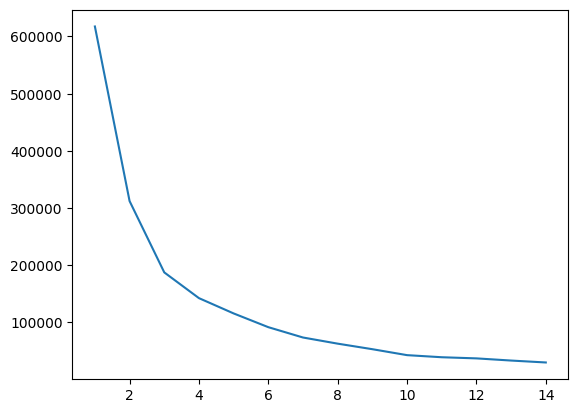

In [20]:
distances = []
cluster_counts = range(1, 15)

for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X)
    distances.append(model.inertia_)

plt.plot(cluster_counts, distances)

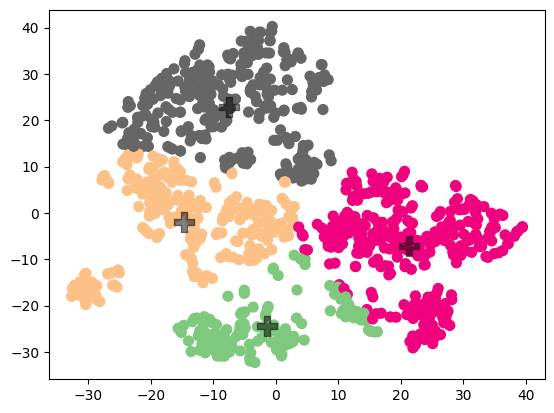

In [16]:
model = KMeans(n_clusters=4, random_state=42, n_init="auto")
labels = model.fit_predict(X)

# Zobrazení bodů
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Accent")

# Zjištění centroidů
centers = model.cluster_centers_

# Zobrazení centroidů
plt.scatter(centers[:, 0], centers[:, 1], c="black", marker="P", s=200, alpha=0.5)

### Připojení informace o shluku k datům

Cluster můžeme připojit k původním datům. Protože u našich dat jsme provedli redukci dimenzionality a tím pádem ztratili původní sloupce, načteme si data znovu ze souboru. Do pandas tabulky pak můžeme přidat `cluster` každé hodnoty jako sloupec.

In [17]:
X_original_input["cluster"] = labels
X_original_input.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


Clustery, které jsme spočítali, jsou poměrně anonymní. Můžeme si ale vypočítat průměrné hodnoty jednotlivých sloupců (features) pro jednotlivé clustery, a to s využitím `pandas` agregace.

Níže třeba vidíme, že shluky se výrazně liší ve sloupci `BALANCE`, přičemž nejnižší hodnotu má shluk 0 a nejvyšší hodnotu shluk 3. Ve sloupcích `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES` a `PURCHASES_FREQUENCY` má nejvyšší hodnotu shluk 2. Pro zákazníky a zákaznice ze shluku 2 by tedy mohly být nejzajímavější bankovní produkty související s nákupem, jako třeba výhodné spotřebitelské úvěry, slevu na platbu kartou atd. Zákazníci ve shluku 3 mají více volné hotovosti, ale méně nakupují, můžeme jim tedy nabídnout například spořící a investiční produkty. Zákazníkům a zákaznící ze shluku 0 bychom mohli nabídnout kontokorentní úvěr, protože u nich hrozí, že se jejich bankovní účet dostane do mínusu.

In [18]:
X_original_input.groupby("cluster").mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,236.180323,0.581129,797.034196,335.222168,462.434266,246.851711,0.463742,0.091040,0.381377,0.024126,0.517483,9.342657,5804.195804,1704.791190,201.606300,0.384215,11.797203
1,1337.069401,0.947656,515.468816,393.430163,122.238653,437.364097,0.268621,0.148458,0.134818,0.064280,1.102041,5.191837,3828.775510,1025.305494,584.493968,0.023064,11.310204
2,2420.557143,0.985088,3983.899188,2518.420649,1465.631981,410.702745,0.951046,0.494913,0.803307,0.055785,1.204545,47.766234,7731.818182,4100.493138,1286.814361,0.242570,11.954545
3,4336.432490,0.983384,614.633355,436.800132,177.833224,3468.554104,0.331765,0.214783,0.155398,0.352464,9.424342,7.963816,7034.868421,3186.783951,2383.591737,0.019356,11.710526


Můžeme se podívat i na počet zákazníků a zákaznic v jednotlivých shlucích.

In [19]:
X_original_input.groupby("cluster").size()

cluster
0    143
1    245
2    308
3    304
dtype: int64

## Další zdroje

- [Introduction to t-SNE](https://www.datacamp.com/tutorial/introduction-t-sne)
- [Principal Component Analysis (PCA)](https://www.youtube.com/watch?v=FD4DeN81ODY)
- [Understanding Clustering: Unveiling the Principles and Techniques of K-mean Clustering](https://medium.com/@abdullahabrar/understanding-clustering-unveiling-the-principles-and-techniques-of-k-mean-clustering-a4659029acbf)

- [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)
- [StatQuest: Hierarchical Clustering](https://www.youtube.com/watch?v=7xHsRkOdVwo)

## Čtení na doma: Počítání vzdálenosti

Jak je spočítána vzdálenost jednotlivých pozorování?

Ze školy si možná vzpomeneš na Euklidovskou vzdálenost, která počítá vzdálenost dvou bodů ve dvourozměrném prostoru.

![1_ZrwEraj9S-u_KOWdKWc8sQ.png](images/1_ZrwEraj9S-u_KOWdKWc8sQ.png)

Vzoreček, pomocí kterého je vzdálenost definována, je na obrázku. Tento vzoreček jde ale převést i do vícerozměrného prostoru. Napří pro třírozměrný prostor by byl:

$Vzdálenost (A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}$

Podobně můžeme přidat čtvrtý rozdměr, pátý rozměr atd. Tímto způsobem počítá vzdálenosti `scikit-learn` ve výchozím nastavení. Konkrétně používá Minkowskiho vzdálenost, která je trochu obecnější než Euklidovská. Místo druhé mocniny a druhé odmocniny umožňuje použít i jinou mocninu a odmocninu (např. třetí, čtvrtou atd.). Mocninu, kterou chceme použít, nastavíme pomocí parametru `p`. Pokud parametr nezadáme, je použita výchozí hodnota, což je 2.